In [21]:
import sys,os
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc
#from sklearn import datasets, linear_model
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress
import pylab
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
#plt.rc(‘text’, usetex=True)

In [22]:
sbn.set(style="white")
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 18})
#plt.rcParams.update({'font.weight': "bold"})
plt.rc('axes', titlesize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['ps.fonttype'] = 42
plt.rc('axes', linewidth=1.5)
#rc('text', usetex=True)
#font = {'family' : 'serif'}
#rc('font', **font)

In [23]:
do_evn = True

0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
100000000.0
[ 4.43136376  4.8260748   5.62221402  4.51851394  3.81954394  3.34635297
  4.12057393  3.95424251  3.60205999  1.40483372  2.94349452  0.65561858
 -0.30103     0.98227123  2.35410844  3.90308999]
['', '', '', '', '', '', '', '', '', '']


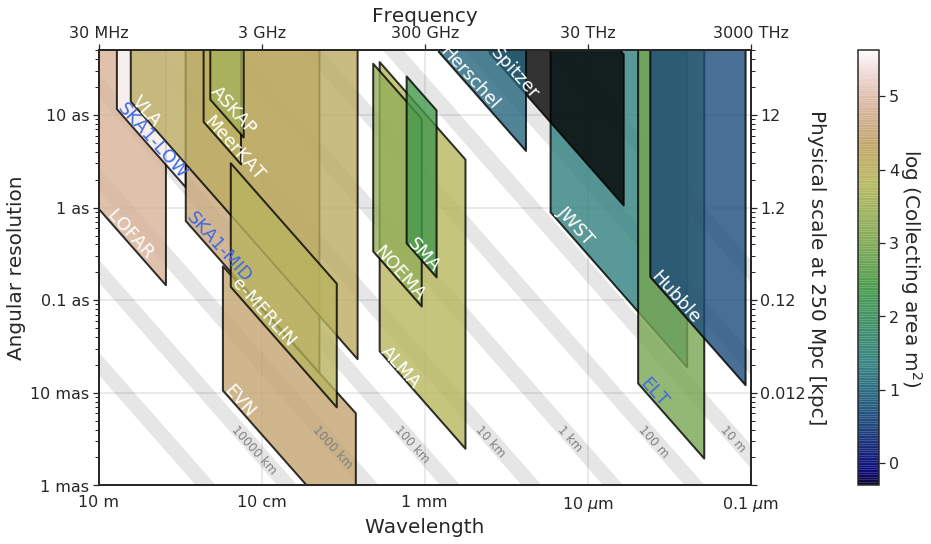

In [24]:
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
#ax2 = ax.twiny().twinx()
tempax = ax.twinx()
ax2 = tempax.twiny()

x10=10.0**(np.array(np.arange(-8,4,1)))
#print(x10)
for i in np.arange(-1,9,1):
    y10=(x10*206265.)/(10.0**i)
    label = str((10.0**i))
    print(label)
    grey_level = '0.9'
    lw1 = 15
    if label == '10.0':
        ax.loglog(x10, y10, color=grey_level, linestyle='-',label=label, linewidth=lw1, zorder = 0)
        ax2.loglog(x10, y10, color=grey_level, linestyle='',label=label, linewidth=lw1, zorder = 0)
    if label == '100000.0':
        ax.loglog(x10, y10, color=grey_level, linestyle='-',label=label, linewidth=lw1, zorder = 0)
        ax2.loglog(x10, y10, color=grey_level, linestyle='',label=label, linewidth=lw1, zorder = 0)
    else:
        ax.loglog(x10, y10, color=grey_level, linestyle='-',label=label, zorder = 0, lw=lw1)
        ax2.loglog(x10, y10, color=grey_level, linestyle='',label=label, zorder = 0, lw=lw1)

# freq_ghz = np.array([1.25, 25])
# baselines_km = [10, 217] # km
c_speed = 299792458.0 # m/s
rad2deg = 180./np.pi
# 3e8/(freq_ghz*1e9)
# 1.22*c_speed/(freq_ghz*10.0**9)/(baseline_km*1000.)*rad2deg*60.0/2.0*60.

# microns to GHz
# c_speed*157*1e-6

def calc_poly(instrument):
    freq_ghz = np.array(instruments[instrument]['freq_ghz'])
    baselines_km = np.array(instruments[instrument]['baselines_km'])
    x_m = 3e8/(freq_ghz*1e9)
    ymin = 1.22*c_speed/(freq_ghz*10.0**9)/(baselines_km[0]*1000.)*rad2deg*60.0/2.0*60.
    ymax = 1.22*c_speed/(freq_ghz*10.0**9)/(baselines_km[1]*1000.)*rad2deg*60.0/2.0*60.
    x = [x_m[0], x_m[0], x_m[1], x_m[1]]
    y = [ymin[0], ymax[0], ymax[1], ymin[1]]
    return np.array([x,y]).T

#patches = []; patches2 = []

instruments = {}
instruments['eMERLIN'] = {'freq_ghz':[1.25, 25],  'baselines_km': [10, 217]}
instruments['NOEMA']   = {'freq_ghz':[70, 276],   'baselines_km': [0.015, 1.6]}
instruments['SMA']     = {'freq_ghz':[180, 420],  'baselines_km': [0.008, 0.509]}
instruments['ALMA']    = {'freq_ghz':[84, 950],   'baselines_km': [0.012, 16]} # 12m, the antenna diam.
instruments['MeerKAT'] = {'freq_ghz':[0.580, 1.670], 'baselines_km': [0.029, 7.7]} 
instruments['Spitzer'] = {'freq_ghz':[1870, 83200], 'baselines_km': [0.00001, 0.00086/2]} # imaging and photometry from 3.6 to 160 micrometers (wiki) Not sure why the /2 is needed, but looks more similar to page 8 of http://skatelescope.ca/wp-content/uploads/2017/09/James-Di-Francesco-jdf.cra_.ngvla_.pdf
instruments['Herschel'] = {'freq_ghz':[447, 5259], 'baselines_km': [0.00001, 0.0035/2]} # Not sure why the /2 is needed, but looks more similar to page 8 of http://skatelescope.ca/wp-content/uploads/2017/09/James-Di-Francesco-jdf.cra_.ngvla_.pdf
instruments['Hubble'] = {'freq_ghz':[176348, 2606890], 'baselines_km': [1e-10, 0.0024/2]} # Not sure why the /2 is needed, but looks more similar to page 8 of http://skatelescope.ca/wp-content/uploads/2017/09/James-Di-Francesco-jdf.cra_.ngvla_.pdf


#eMERLIN = np.array([[0.3,200.], [0.3,0.2], [0.01356,0.02], [0.1356,200.]])
##eMERLINy = [5.625409,0.22486,0.011243,0.317347]
# 217 km, 10 km, 1.25 GHz to 25 GHz
#eMERLINx = [0.24,0.24,0.012,0.012]
#eMERLINy = [3.0176,0.13906,0.006953,0.15088]
#eMERLIN=list(zip(eMERLINx,eMERLINy))
eMERLIN = calc_poly('eMERLIN')

##JVLAx = [4.05,4.05,0.00666,0.00666]
##JVLAy = [20000.,24,0.043,32]
# Bmax = 36.4km, freq_min = 0.074 , freq_max = 45
JVLAx = [4.054, 4.054, 0.00666,0.00666]
JVLAy = [14563840.26674269,14.003, 0.02303, 23949.42621642]
JVLA=list(zip(JVLAx,JVLAy))

#SKAMID1x = [0.389,0.389,0.02398,0.02398]
#SKAMID1y = [2769.22039182,0.7,0.04,170.583976136]
# 150km, 0.350 - 15.3
SKAMID1x = [0.857,0.857,0.0196,0.0196]
SKAMID1y = [2769.22039182,0.7184,0.01643,170.583976136]
SKAMID1=list(zip(SKAMID1x,SKAMID1y))
ASKAPx = [0.42827494,0.42827494,0.1665513655556,0.1665513655556]
ASKAPy = [4015.36956814,14.7230217499,5.72561956939,1561.53260983]
ASKAP=list(zip(ASKAPx,ASKAPy))
##SKALOW1x = [2.725385981818,2.725385981818,0.9993081933333,0.9993081933333]
# 65km, 50-350 MHz
SKALOW1x = [6.0, 6.0, 0.857, 0.857]
SKALOW1y = [16061.4782726,11.606, 1.658,5889.20869994]

SKALOW1=list(zip(SKALOW1x,SKALOW1y))
#ALMAx = [0.0029979246,0.0029979246,0.000344589,0.000344589]
#ALMAy = [66.7,0.21,0.024,7.7]
#ALMA=list(zip(ALMAx,ALMAy))
if do_evn:
    f = 1
else:
    f = 1e6
EVNx = [0.3*f,0.3*f,0.007*f,0.007*f]
EVNy = [0.232629*f,(10.57/1000.)*f,(0.25/1000.)*f,0.006*f]
EVN=list(zip(EVNx,EVNy))

#NOEMAx = [0.00299792458,0.00299792458,0.001303445469565,0.001303445469565]
#NOEMAy = [41.22,1.,0.4,17.923]
# Max baseline 0.76m, bsl_min =0.015, freq = [70,276] 
#NOEMA=list(zip(NOEMAx,NOEMAy))
# SMAx = [0.000717,0.000717,0.00167,0.00167]
# SMAy = [9.24325,0.29112599,0.678075,21.528909]
# SMA=list(zip(SMAx,SMAy))
NOEMA = calc_poly('NOEMA')
SMA = calc_poly('SMA')
ALMA = calc_poly('ALMA')
MeerKAT = calc_poly('MeerKAT')
Spitzer = calc_poly('Spitzer')
Herschel = calc_poly('Herschel')
Hubble = calc_poly('Hubble')
#MeerKATx = [0.5168835482759,0.5168835482759,0.171309976,0.171309976]
#MeerKATy = [3676.37879604,13.3268731356,4.41690652496,1218.4569724]
#MeerKAT=list(zip(MeerKATx,MeerKATy))
LOFARx = [20,20, 1.5, 1.5]
##LOFARy = [60666.,3.3,0.21,3791.]
LOFARy = [60666., 1.93437, 0.14507, 3791.]
LOFAR=list(zip(LOFARx,LOFARy))
#Hubblex = [1.8e-6,1.8e-6,1e-7,1e-7]
#Hubbley = [100000.,0.154698,0.008594375,100000.]
#Hubble=list(zip(Hubblex,Hubbley))
JWSTx = [6e-7,6e-7,2.85e-5,2.85e-5]
JWSTy = [100000.,0.01875136363,0.89068977272,100000.]
JWST=list(zip(JWSTx,JWSTy))
ELTx = [3.7e-7,3.7e-7,2.4e-6,2.4e-6]
ELTy = [100000.,0.00194193511,0.01259633587,100000.]
ELT=list(zip(ELTx,ELTy))

#GMRTx = [6, 6, 0.2, 0.2]
#GMRTy = [2000, 30.17,1.00, 20000]
#GMRT=list(zip(GMRTx,GMRTy))

all_patches = {
'EVN': Polygon(EVN),
'LOFAR': Polygon(LOFAR),
'SKALOW1': Polygon(SKALOW1),
'SKAMID1': Polygon(SKAMID1),
'ALMA': Polygon(ALMA),
'NOEMA': Polygon(NOEMA),
'JVLA': Polygon(JVLA),
'MeerKAT': Polygon(MeerKAT),
'ASKAP': Polygon(ASKAP),
'JWST': Polygon(JWST),
'ELT': Polygon(ELT),
'Hubble': Polygon(Hubble),
'Spitzer': Polygon(Spitzer),
'Herschel': Polygon(Herschel),
'SMA': Polygon(SMA),
#'GMRT': Polygon(GMRT),
'eMERLIN': Polygon(eMERLIN),
}
patches = [v for k,v in all_patches.items()]

# https://www.skatelescope.org/wp-content/uploads/2018/05/SKA1-telescope-size-comparison-infographic.pdf
#SKALOW1 =419000.,
areas = {
'EVN': 27000,
'JVLA': 13200,
'SKAMID1': 33000,
'ASKAP': 4000,
'ALMA': 6600,
'NOEMA': 2220, # From https://events.asiaa.sinica.edu.tw/school/20160815/talk/jcarpenter0817.pdf
'MeerKAT': 9000,
'LOFAR': 67000,
'Hubble': 4.525,
'JWST': 25.4, # https://en.wikipedia.org/wiki/James_Webb_Space_Telescope
'ELT': 878, # https://en.wikipedia.org/wiki/Extremely_Large_Telescope
'SMA': 226, # From https://events.asiaa.sinica.edu.tw/school/20160815/talk/jcarpenter0817.pdf
#'GMRT': 48000,
'SKALOW1': 419000,
'eMERLIN': 8000 ,
'Spitzer': 0.5, # 50 times better thatn JWST
'Herschel': 9.6 # https://en.wikipedia.org/wiki/Herschel_Space_Observatory
}


    
##colors = np.array([27000.,13000.,23500.,4000.,6600.,1770.,9000.,2400.,4.525, 25.,39.3,226.,8000.])/1000.
## With GMRT colors = np.array([27000.,13200.,33000.,4000., 6600.,1770.,9000.,52000./2.,4.525, 25.,39.3,226., 48000., 8000.])/1000.
#colors = np.array([27000.,13200.,33000.,4000., 6600.,1770.,9000.,52000./2.,4.525, 25.,39.3,226., 8000.])/1000.
# With SKALow but not GMRT and realistic LOFAR:
#colors = np.array([27000.,13200.,4000.,  6600.,9000.,67000.,4.525, 25.,39.3,226., 419000, 8000.])
#colors = np.array([27000.,33000.,1770.,13200.,33000.,4000.,  6600.,1770.,9000.,67000.,4.525, 25.,39.3,226., 419000, 8000.])
colors = np.array([areas[k] for k,v in all_patches.items()])

colors = np.log10(colors)

print(colors)
p = PatchCollection(patches, alpha=0.8, edgecolor='black', linewidth=2, cmap='gist_earth')
# cmaps = flare_r, viridis, crest, cividis
p.set_array(colors)
ax.add_collection(p)
#fig.colorbar(p, ax=ax)



cbar = fig.colorbar(p, ax=ax, pad=0.12)
cbar.ax.set_ylabel(r'log (Collecting area m$^{2}$)', rotation=270, fontsize = 20, labelpad=25)

#Goonhillyx = [0.3,0.3,0.0428,0.0428]
#Goonhillyy = [0.22486,(0.22486/2.),(0.035/2.),0.035]
#Goonhilly=list(zip(Goonhillyx,Goonhillyy))
#polygon1a = Polygon(Goonhilly)
#patches2.append(polygon1a)
#p2 = PatchCollection(patches2, alpha=0.5, edgecolor='black', linewidth=2)
#p2.set_array(np.array([8450.])/1000.)
#ax.add_collection(p2)




#ax.set_yscale('log')
#ax.loglog([10.000001,0.0000001], [0.04,0.04], color='red', linestyle='--',label=label, linewidth=4)

ax.set_ylim(0.001, 50.0)
ax2.set_ylim(0.001, 50.0)

ax.grid(which='major', color='0.2', linestyle='-', linewidth=2, zorder=0, alpha=0.1)
ax.invert_xaxis()
ax2.invert_xaxis()

#ax2 = ax.twiny()
#ax2.set_ylim(0.001, 100.0)
#ax2.invert_xaxis()


a=ax.get_yticks().tolist()
#print(a)
a[0]='0.1 mas'; a[1] = '1 mas'; a[2] = '10 mas'; a[3] = '0.1 as'; a[4] = '1 as'; a[5] = '10 as'; a[6] = '100 as'; a[7] = '1000 as'
ax.set_yticklabels(a)

a=ax.get_yticks().tolist()
#print(a)
# z=1.25
#a[0]='0.00086'; a[1] = '0.0086'; a[2] = '0.086'; a[3] = '0.86'; a[4] = '8.6'; a[5] = '86'; a[6] = '860'; a[7] = '8600'
# At z = 0.06 (~250Mpc), This gives a scale of 1.167 kpc/". 
a[0]=''; a[1] = ''; a[2] = '0.012'; a[3] = '0.12'; a[4] = '1.2'; a[5] = '12'; a[6] = '120'; a[7] = '1200'

ax2.set_yticklabels(a)

labels = [item.get_text() for item in ax.get_xticklabels()]
print(labels)
#labels[0] = ''; labels[1] = ''; 
#labels[0] = r'0.1 $\mu$m'; labels[1] = r'1 $\mu$m'; labels[2] = r'10 $\mu$m'; labels[3] = r'100 $\mu$m'; labels[4] = r'1 mm'; labels[5] = r'1 cm'; labels[6] = r'10 cm'; labels[7] = r'1 m'; labels[8] = r'10 m'; labels[9] = r'100 m'
labels[1] = r'0.1 $\mu$m'; labels[2] = r'10 $\mu$m'; labels[3] = r'1 mm'; labels[4] = r'10 cm';  labels[5] = r'10 m'; 




#print(labels)#ax.set_xticklabels(xuplabels)
ax.set_xticklabels(labels)

labels2 = [item.get_text() for item in ax2.get_xticklabels()]
labels[1] = r'3000 THz';  labels[2] = r'30 THz'; labels[3] = r'300 GHz'; labels[4] = r'3 GHz';  labels[5] = r'30 MHz'; 

#labels[1] = r'300 THz'; labels[2] = r'30 THz'; labels[3] = r'3 THz'; labels[4] = r'300 GHz'; labels[5] = r'30 GHz'; labels[6] = r'3 GHz'; labels[7] = r'300 MHz'; labels[8] = r'30 MHz'; labels[9] = r'3 MHz'
ax2.set_xticklabels(labels)

ax.set_ylabel('Angular resolution', fontsize=20)
ax.set_xlabel('Wavelength', fontsize=20)
#ax2.set_ylabel(r'Physical scale at 250 Mpc [kpc]', fontsize=20,rotation=270)
#ax2.set_ylabel(r'Physical scale at z=1.25 (kpc)', fontsize=20, weight='bold',rotation=270)
ax2.set_xlabel(r'Frequency', fontsize=20)
#tempax.set_ylabel(r'Physical scale at z=1.25 (kpc)', fontsize=20, rotation=270)
tempax.set_ylabel(r'Physical scale at 250 Mpc [kpc]', fontsize=20, rotation=270)
tempax.yaxis.labelpad = 20

ax.set_xlim(10.000001,0.0000001)
ax2.set_xlim(10.000001,0.0000001)

rot_angle = -48
plt.text(0.24, 0.15, 'e-MERLIN', ha='left', rotation=rot_angle, wrap=True, color='white')
#plt.text(0.3, (0.22486/2.), '+Goonhilly', ha='left', rotation=-52, wrap=True, color='white', fontsize=16)
plt.text(4.054, 14, 'VLA', ha='left', rotation=rot_angle, wrap=True, color='white')

#JVLAx = [4.054, 4.054, 0.00666,0.00666]
#JVLAy = [14563840.26674269,14.003, 0.02303, 23949.42621642]
#JVLAx = [0.81, 0.81,0.00666,0.00666]
#JVLAy = [20000.,2.8007, 0.02302, 32]

future_color = 'royalblue'# 'forestgreen' # mediumseagreen') # 'royalblue'
##plt.text(0.15, 3.7, 'SKA1-MID', ha='left', rotation=rot_angle, wrap=True, color='black')
plt.text(0.857, 0.7184+0.06, 'SKA1-MID', ha='left', rotation=rot_angle, wrap=True, color=future_color) # 'royalblue'

plt.text(0.42827494,17.7230217499, 'ASKAP', ha='left', rotation=rot_angle, wrap=True, color='white')
#plt.text(0.9993081933333,4., 'SKA1-LOW', ha='right', rotation=-42.5, wrap=True, color='black')
plt.text(6, 11.8, 'SKA1-LOW', ha='left', rotation=rot_angle, wrap=True, color=future_color)

plt.text(MeerKAT[0,0], MeerKAT[1,1], 'MeerKAT', ha='left', rotation=rot_angle, wrap=True, color='white')
plt.text(ALMA[0,0], ALMA[1,1], 'ALMA', ha='left', rotation=rot_angle, wrap=True, color='white')
if do_evn:
    plt.text(0.3,(10.57/1000.), 'EVN', ha='left', rotation=rot_angle, wrap=True, color='white')
plt.text(NOEMA[0,0], NOEMA[1,1], 'NOEMA', ha='left', rotation=rot_angle, wrap=True, color='white')
plt.text(Herschel[0,0], Herschel[1,1], 'Herschel', ha='left', rotation=rot_angle, wrap=True, color='white')
plt.text(Spitzer[0,0], Spitzer[1,1], 'Spitzer', ha='left', rotation=rot_angle, wrap=True, color='white')
plt.text(Hubble[0,0], Hubble[1,1], 'Hubble', ha='left', rotation=rot_angle, wrap=True, color='white')

plt.text(2.3, 0.25, '      LOFAR ', ha='right', rotation=rot_angle, wrap=True, color='white')
plt.text(2.85e-5-0.5e-5,0.89068977272, 'JWST', ha='left', rotation=rot_angle, wrap=True, color='white')
plt.text(2.4e-6-0.1e-6,0.01259633587, 'ELT', ha='left', rotation=rot_angle, wrap=True, color=future_color)
plt.text(SMA[0,0], SMA[1,1], 'SMA', ha='left', rotation=rot_angle, wrap=True, color='white')


#plt.text(2.4e-4,24.0, '1 m', ha='left', rotation=-45., wrap=True, color='black', fontsize=12)
##plt.text(2.4e-4,2.4, '10 m', ha='left', rotation=-45., wrap=True, color='black', fontsize=12)
#plt.text(2.4e-4,4.0, '10 m', ha='left', rotation=rot_angle, wrap=True, color='0.5', fontsize=12)
plt.text(2.4e-7,0.004, '10 m', ha='left', rotation=rot_angle, wrap=True, color='0.5', fontsize=12)
#plt.text(2.4e-4,0.24, '100 m', ha='left', rotation=-45., wrap=True, color='black', fontsize=12)
##plt.text(2.4e-4,0.024, '1 km', ha='left', rotation=-45., wrap=True, color='black', fontsize=12)
plt.text(2.4e-6,0.0040, '100 m', ha='left', rotation=rot_angle, wrap=True, color='0.5', fontsize=12)
plt.text(2.4e-5,0.0040, '1 km', ha='left', rotation=rot_angle, wrap=True, color='0.5', fontsize=12)
#plt.text(2.4e-4,0.0024, '10 km', ha='left', rotation=-45., wrap=True, color='black', fontsize=12)
##plt.text(2.4e-3,0.0024, '100 km', ha='left', rotation=-45., wrap=True, color='black', fontsize=12)
plt.text(2.4e-4,0.0040, '10 km', ha='left', rotation=rot_angle, wrap=True, color='0.5', fontsize=12)
plt.text(2.4e-3,0.0040, '100 km', ha='left', rotation=rot_angle, wrap=True, color='0.5', fontsize=12)

plt.text(2.4e-2,0.0040, '1000 km', ha='left', rotation=rot_angle, wrap=True, color='0.5', fontsize=12)
plt.text(2.4e-1,0.0040, '10000 km', ha='left', rotation=rot_angle, wrap=True, color='0.5', fontsize=12)



plt.savefig('e-MERLIN_res_wave3.png', bbox_inches='tight', dpi=200)
